####Netflix Movie Ratings Analysis

##This project analyzes Netflix movie and user rating data to uncover trends and patterns. It identifies top-rated movies, the most generous and active users, and rating trends by release decade. Key metrics like average ratings, number of ratings, and rating variability were calculated and visualized using bar charts and histograms. The analysis demonstrates data wrangling, aggregation, filtering, and visualization skills with pandas, matplotlib, and seaborn.

Import and Acquire dataframes

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Movies_df = pd.read_csv("C:/Users/Ricki/.cache/kagglehub/datasets/rishitjavia/netflix-movie-rating-dataset/versions/1/Netflix_Dataset_Movie.csv")
Ratings_df = pd.read_csv("C:/Users/Ricki/.cache/kagglehub/datasets/rishitjavia/netflix-movie-rating-dataset/versions/1/Netflix_Dataset_Rating.csv")
Ratings_df.tail()

,User_ID,Rating,Movie_ID
17337453,520675,3,4496
17337454,1055714,5,4496
17337455,2643029,4,4496
17337456,1559566,3,4496
17337457,293198,3,4496


In [21]:
Movies_df.head()

,Movie_ID,Year,Name
0,1,2003,Dinosaur Planet
1,2,2004,Isle of Man TT 2004 Review
2,3,1997,Character
3,4,1994,Paula Abdul's Get Up & Dance
4,5,2004,The Rise and Fall of ECW


Merged on Movie_ID to align matching records from both datasets
Inner merge to remove any movies without ratings for clean and accurate analysis

In [22]:
dfs = Movies_df.merge(Ratings_df, on="Movie_ID", how="inner").set_index("Movie_ID")

In [23]:
dfs.tail()

,Year,Name,User_ID,Rating
Movie_ID,,,,
4496,1993,Farewell My Concubine,520675,3
4496,1993,Farewell My Concubine,1055714,5
4496,1993,Farewell My Concubine,2643029,4
4496,1993,Farewell My Concubine,1559566,3
4496,1993,Farewell My Concubine,293198,3


In [24]:
#verify no NaN
unrated=dfs[dfs["Rating"].isna()]
unrated.head()

,Year,Name,User_ID,Rating
Movie_ID,,,,


Group by Movie_ID to view average rating per movies
Sort averages descending to show highest rated 

In [25]:
bymovies = dfs.groupby(["Movie_ID", "Name"])["Rating"].mean().sort_values(ascending=False)
bymovies.head(10)

Movie_ID  Name                                         
3456      Lost: Season 1                                   4.665432
2102      The Simpsons: Season 6                           4.589824
3444      Family Guy: Freakin' Sweet Collection            4.520766
1476      Six Feet Under: Season 4                         4.461601
4238      Inu-Yasha                                        4.457774
2568      Stargate SG-1: Season 8                          4.456026
1256      The Best of Friends: Vol. 4                      4.449168
4427      The West Wing: Season 3                          4.436258
2452      Lord of the Rings: The Fellowship of the Ring    4.431489
1947      Gilmore Girls: Season 3                          4.428943
Name: Rating, dtype: float64

Found most generous users based on highest average rating and number of ratings.

In [7]:
users=dfs.groupby("User_ID")["Rating"].agg(["mean", "count"]).sort_values(by=["mean", "count"], ascending=[False, False])
top_raters = users[users["count"] > 20]
half = int(len(top_raters / 2))
most_generous = top_raters.head(half)
most_generous

,mean,count
User_ID,,
794999,5.000000,797
1309838,5.000000,627
1745577,5.000000,366
336578,5.000000,231
1663569,5.000000,201
...,...,...
13227,1.311787,263
17707,1.172414,116
2640999,1.059761,251


Copy the dataset, keep only years from 1900–2025, and create a new Decades column for analysis by decade.

In [8]:
df = dfs.copy()
df=df[(df["Year"] >= 1900) & (df["Year"] <= 2025)]
df["Decades"] = (df["Year"] // 10 * 10).astype("Int64")

In [10]:
df.sample(5)

,Year,Name,User_ID,Rating,Decades
Movie_ID,,,,,
607,1994,Speed,2497305,4,1990
1102,2001,Training Day,1960600,4,2000
1260,1999,Journey to the Center of the Earth,2411423,3,1990
3626,2002,25th Hour,1323186,3,2000
1660,2000,SpongeBob SquarePants: Season 2,1209950,1,2000


In [11]:
decade_stats = (df.dropna(subset=["Rating"]).groupby("Decades").agg(mean_rating=("Rating", "mean"), num_ratings=("Rating", "count"), num_titles=("Name", "nunique")).sort_index())

In [12]:
decade_stats

,mean_rating,num_ratings,num_titles
Decades,,,
1920,3.644350,14070,3
1930,4.010075,129921,16
1940,3.882224,112816,23
1950,3.906045,334980,45
1960,3.766029,378350,63
1970,3.761581,745604,80
1980,3.608146,2283876,200
1990,3.594061,5520649,451
2000,3.533370,7817192,469


Filter decades to those with at least 200 ratings, then create a bar chart showing the average movie rating per decade.

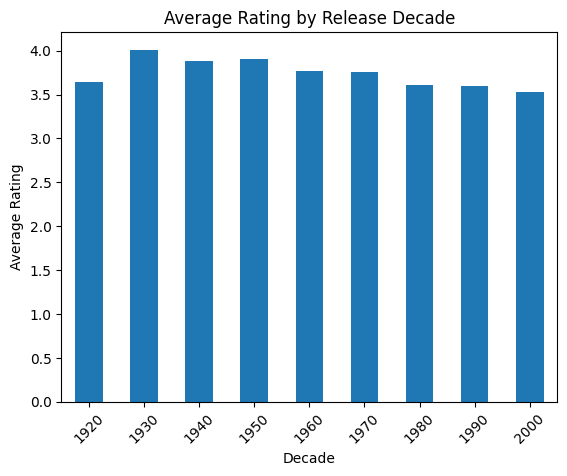

In [13]:
MIN_RATINGS = 200
decade_stats_filtered = decade_stats[decade_stats['num_ratings'] >= MIN_RATINGS]
decade_stats_filtered['mean_rating'].plot(kind='bar', rot=45)
plt.title('Average Rating by Release Decade')
plt.ylabel('Average Rating')
plt.xlabel('Decade')
plt.show()

In [14]:
twenties = df[df["Decades"]== 1920].groupby("Name")["Rating"].agg(["count", "mean"])
twenties

,count,mean
Name,,
Battleship Potemkin,2892,3.818465
Nosferatu: Original Version,7923,3.684463
The Mark of Zorro,3255,3.392012


Filtered the dataset to include only the most generous users, then grouped by User_ID to calculate their average rating, number of ratings, and standard deviation of ratings. The standard deviation is then used to visualize rating variability across users.

In [29]:
df_HR = df[df["User_ID"].isin(most_generous.index)]
user_std = df_HR.groupby("User_ID").agg(average_rating=("Rating", "mean"),
                                       rating_count=("Rating", "count"), rating_std=("Rating", "std")).sort_values(by=[
                                        'average_rating', 'rating_count', 'rating_std'], ascending=[False, False, False])
user_std

,average_rating,rating_count,rating_std
User_ID,,,
794999,5.000000,797,0.000000
1309838,5.000000,627,0.000000
1745577,5.000000,366,0.000000
336578,5.000000,231,0.000000
1663569,5.000000,201,0.000000
...,...,...,...
13227,1.311787,263,0.705576
17707,1.172414,116,0.379378
2640999,1.059761,251,0.473724


This histogram shows the distribution of rating variability among the most generous users. Higher standard deviation indicates users whose ratings are more spread out, while lower values show users who rate consistently.

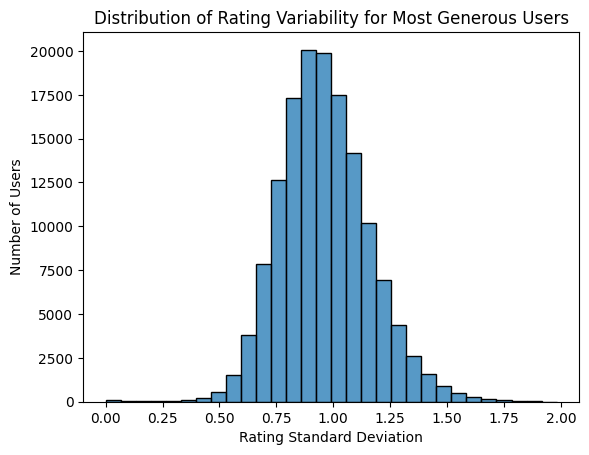

In [46]:
sns.histplot(user_std['rating_std'], bins=30)
plt.title("Distribution of Rating Variability for Most Generous Users")
plt.xlabel("Rating Standard Deviation")
plt.ylabel("Number of Users")
plt.show()